In [0]:
import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tnrange, tqdm
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
raster = gdal.Open("/content/drive/My Drive/Data_Sirius/crops/20170101_mosaic_cropped.tif")

In [0]:
fields = np.array(raster.ReadAsArray())

In [0]:
test = gdal.Open('/content/drive/My Drive/Data_Sirius/crops/test.tif')
train = gdal.Open('/content/drive/My Drive/Data_Sirius/crops/train_crops.tif')
test_mask = np.array(test.ReadAsArray())
train_mask = np.array(train.ReadAsArray())

In [0]:
#plt.plot(X, y '.r');

In [0]:
train_mask[train_mask  >= 10] = 0
np.unique(train_mask)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
test_mask[test_mask  >= 10] = 0
np.unique(test_mask)

array([0, 1], dtype=uint8)

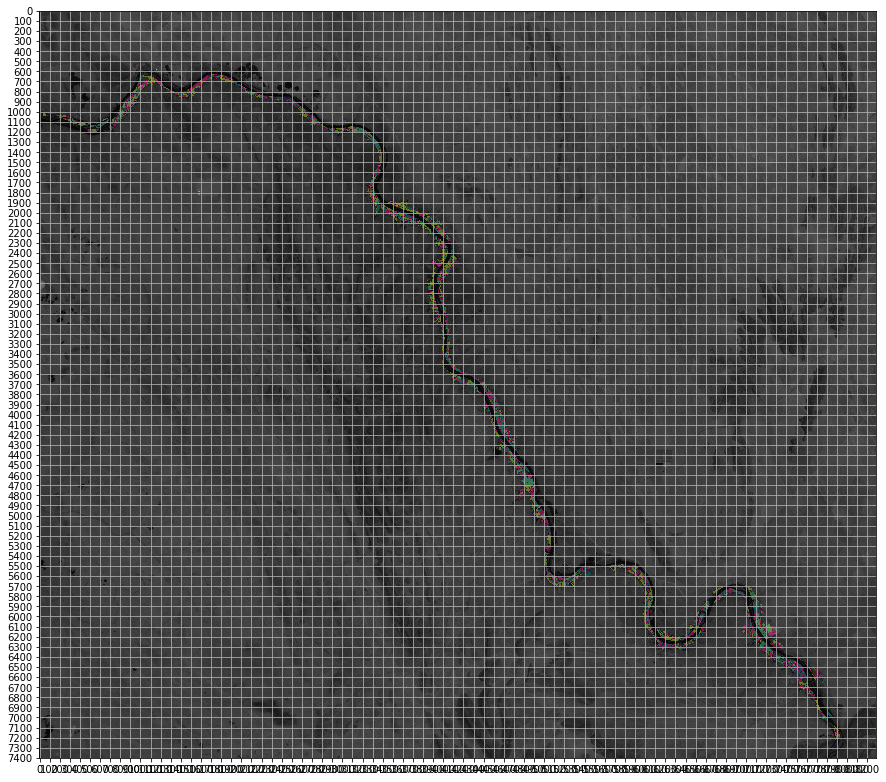

In [0]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 256)
train_colors = viridis(np.linspace(0, 1, 256))
test_colors = viridis(np.linspace(0, 1, 256))
transp = np.array([0, 0, 0, 0])
train_colors[:25, :] = transp
train_cmp = ListedColormap(train_colors)
pink = np.array([248/256, 24/256, 148/256, 1])
test_colors[:128, :] = transp
test_colors[128:, :] = pink
test_cmp = ListedColormap(test_colors)
plt.figure(figsize=(15, 15))
plt.imshow(fields[12, ...], cmap='gray')
plt.imshow(train_mask, alpha=0.5, cmap=train_cmp)
plt.imshow(test_mask, alpha=0.5, cmap=test_cmp)
plt.xticks(np.arange(0, fields.shape[2], 100))
plt.yticks(np.arange(0, fields.shape[1], 100))
plt.grid()

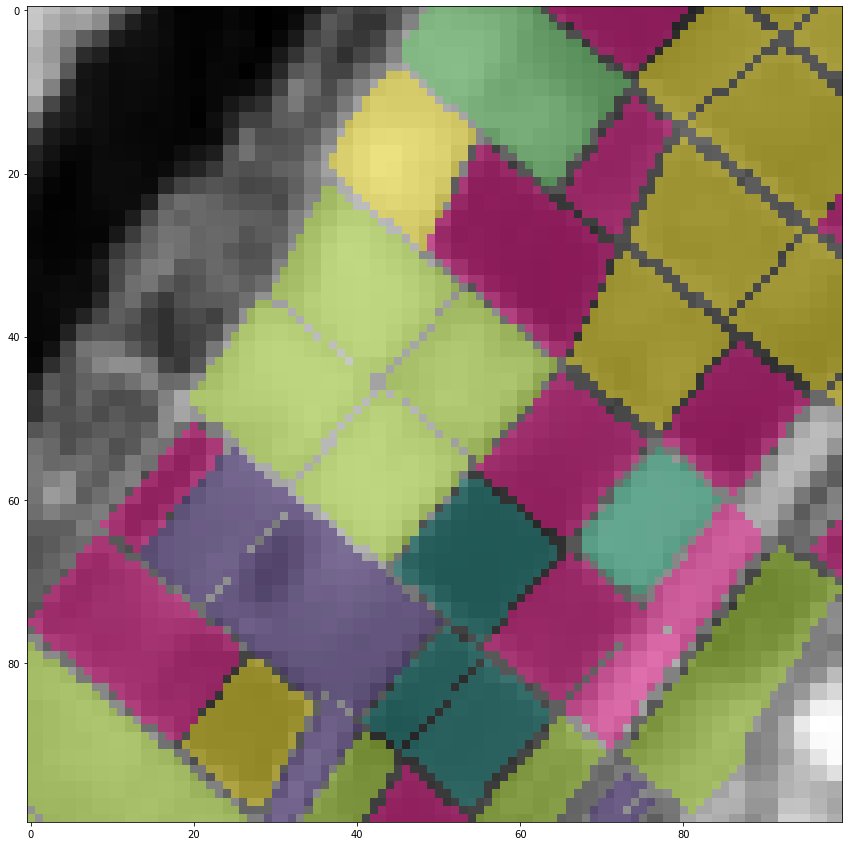

In [0]:
plt.figure(figsize=(15, 15))
plt.imshow(fields[12,900:1000,800:900], cmap='gray')
plt.imshow(train_mask[900:1000,800:900], alpha=0.5, cmap=train_cmp)
plt.imshow(test_mask[900:1000,800:900], alpha=0.5, cmap=test_cmp)

In [0]:
step = 100
results = np.zeros(((fields.shape[1]//step + 1)*(fields.shape[2]//step + 1), 7), dtype=int)
k = 0
for i in range(0, fields.shape[1], step):
  for j in range(0, fields.shape[2], step):
    results[k, 0] = i
    results[k, 1] = i+step
    results[k, 2] = j
    results[k, 3] = j+step
    results[k, 4] = np.sum(train_mask[i:i+step, j:j+step] > 0)
    results[k, 5] = np.sum(test_mask[i:i+step, j:j+step] > 0)
    results[k, 6] = results[k, 4] + results[k, 5]
    k += 1
results = pd.DataFrame(results, columns=['x min', 'x max', 'y min', 'y max', 'train', 'test', 'train + test'])

In [0]:
val_results = results[(results['train'] > 0) & (results['train'] < 100)]
val_results

,x min,x max,y min,y max,train,test,train + test
513,600,700,1500,1600,21,117,138
599,700,800,1800,1900,88,0,88
602,700,800,2100,2200,53,0,53
674,800,900,1000,1100,77,0,77
834,1000,1100,400,500,43,0,43
835,1000,1100,500,600,20,0,20
1026,1200,1300,3000,3100,6,55,61
1615,1900,2000,3800,3900,8,0,8
2116,2500,2600,4100,4200,33,5,38
2364,2800,2900,4000,4100,35,389,424


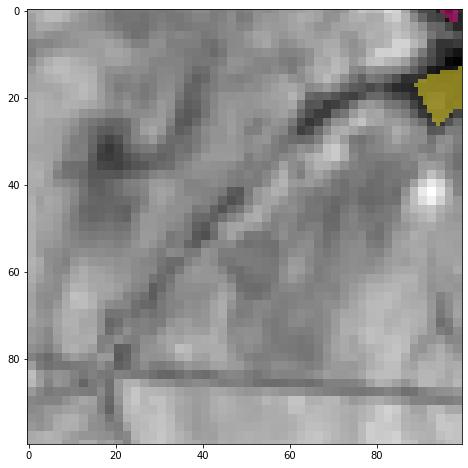

In [0]:
xmin, xmax, ymin, ymax, _, _, _ = results.iloc[2944,:]

plt.figure(figsize=(8, 8))
plt.imshow(fields[12, xmin:xmax, ymin:ymax], cmap='gray')
plt.imshow(train_mask[xmin:xmax, ymin:ymax], alpha=0.5, cmap=train_cmp)
plt.imshow(test_mask[xmin:xmax, ymin:ymax], alpha=0.5, cmap=test_cmp)

In [0]:
np.transpose(fields[:, xmin:xmax, ymin:ymax], (1, 2, 0)).shape
dataset = results[(results['train'] >= 100)]
dataset
mask = np.zeros_like(fields[0, ...])
for i in range(dataset.shape[0]):
  xmin, xmax, ymin, ymax, _, _, _ = dataset.iloc[i, :]
  mask[xmin:xmax, ymin:ymax] = 1

In [0]:
viridis = cm.get_cmap('viridis', 256)
mask_colors = viridis(np.linspace(0, 1, 256))
transp = np.array([0, 0, 0, 0])
white = np.array([1, 1, 1, 1])
mask_colors[:128, :] = transp
mask_colors[128:, :] = white
mask_cmp = ListedColormap(mask_colors)

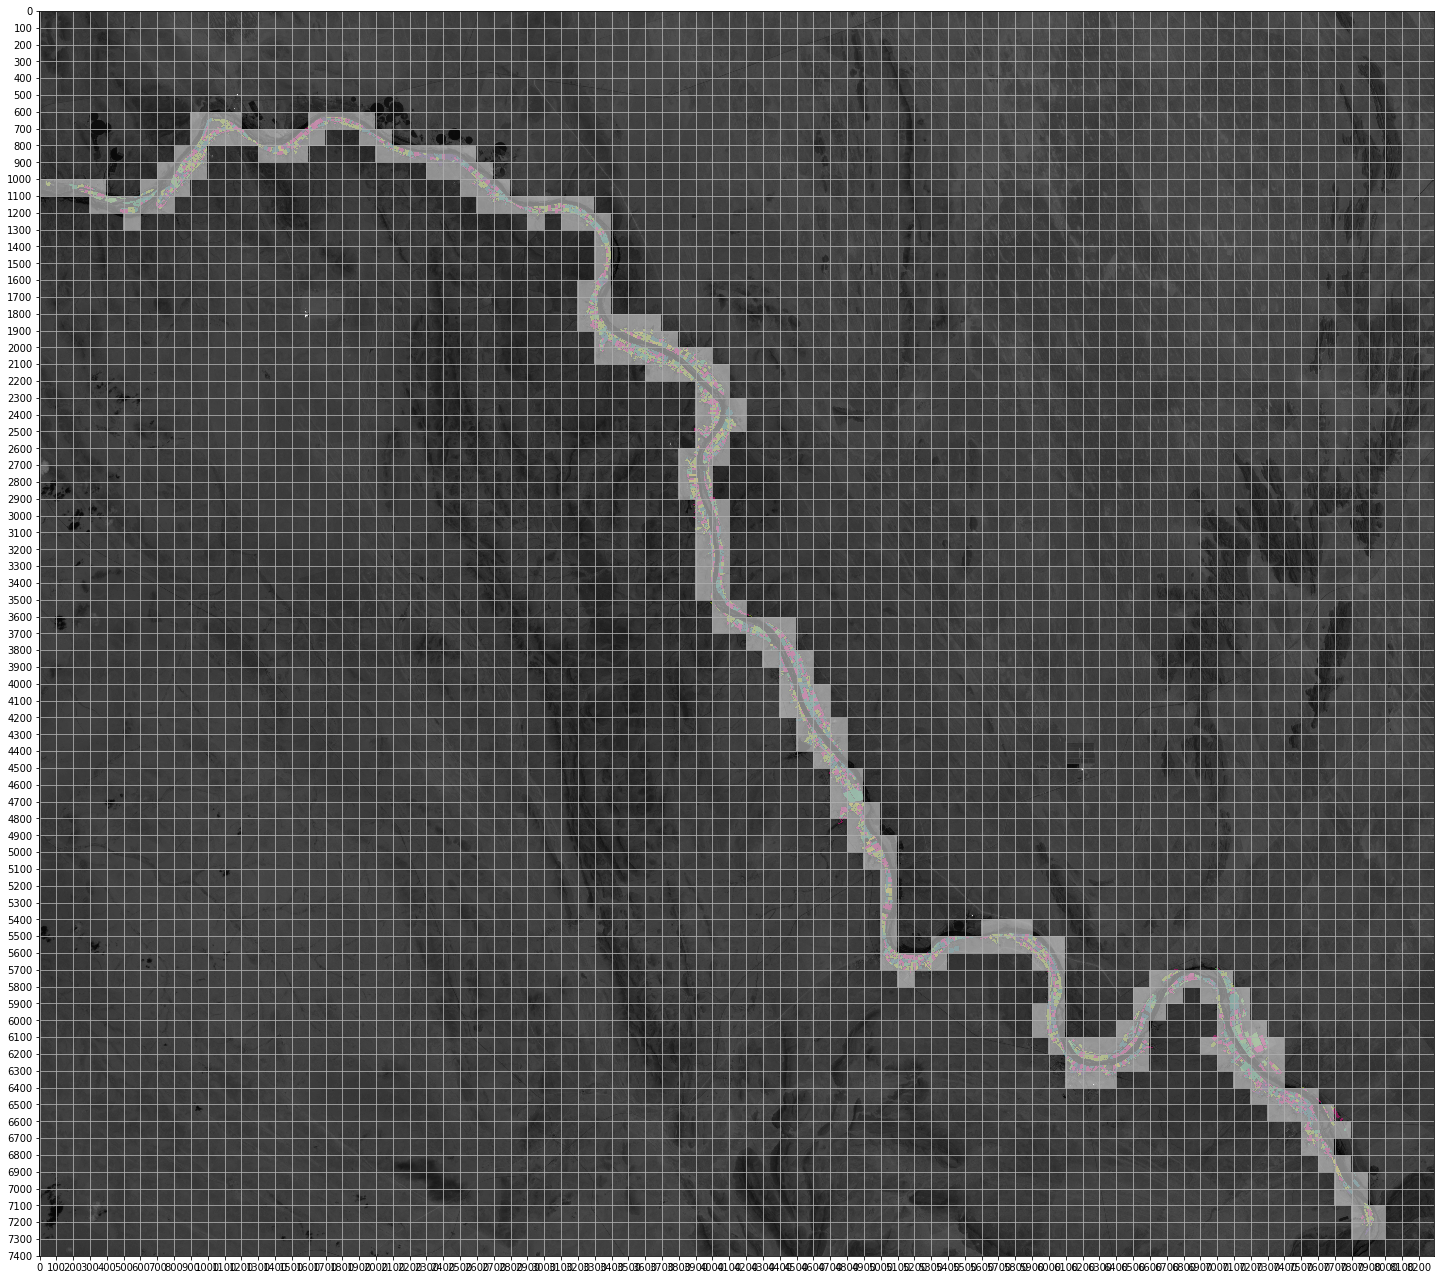

In [0]:
plt.figure(figsize=(25, 25))
plt.imshow(fields[12, ...], cmap='gray')
plt.imshow(train_mask, alpha=0.5, cmap=train_cmp)
plt.imshow(test_mask, alpha=0.5, cmap=test_cmp)
plt.imshow(mask, alpha=0.5, cmap=mask_cmp)
plt.xticks(np.arange(0, fields.shape[2], 100))
plt.yticks(np.arange(0, fields.shape[1], 100))
plt.grid()

In [0]:
 r = fields[3,:,:]

In [0]:
nir = fields[7,:,:]

In [0]:
ndvi = (nir - r)/ (nir+r)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [0]:
ndvi.shape

(7467, 8292)

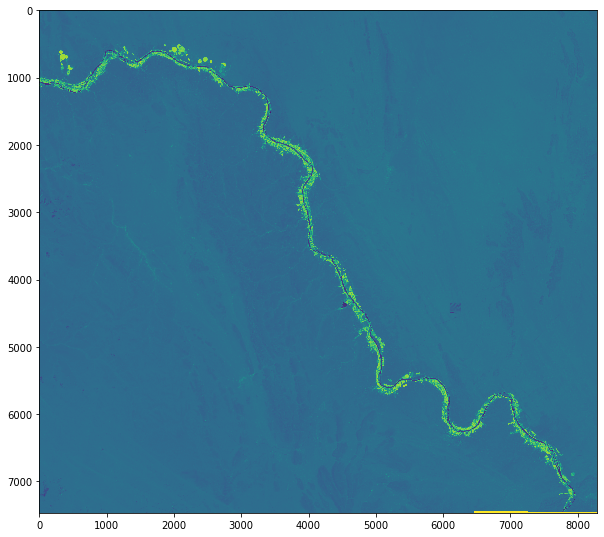

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(ndvi)

In [0]:
fields.shape

(13, 7467, 8292)

In [0]:

ndvi= ndvi.reshape(1,7467, 8292)

In [0]:
ndvi.shape

(1, 7467, 8292)

In [0]:
fields_new = np.concatenate((fields,ndvi),axis=0)

In [0]:
fields_new.shape

(14, 7467, 8292)